**Import Required Libraries**

In [1]:
!pip install matplotlib
!pip install plotly
!pip install seaborn
!pip install numpy
!pip install scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
import os

**Read the csv File**

In [2]:
Forest=pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project2/Bird_Species_Observation/DataSet/CleanDataSet/Cleaned_Forest_DataSet.csv")
Grassland=pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project2/Bird_Species_Observation/DataSet/CleanDataSet/Cleaned_Grassland_DataSet.csv")

In [3]:
Grassland.head()

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [4]:
Grassland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8531 entries, 0 to 8530
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Admin_Unit_Code              8531 non-null   object 
 1   Plot_Name                    8531 non-null   object 
 2   Location_Type                8531 non-null   object 
 3   Year                         8531 non-null   int64  
 4   Date                         8531 non-null   object 
 5   Start_Time                   8531 non-null   object 
 6   End_Time                     8531 non-null   object 
 7   Observer                     8531 non-null   object 
 8   Visit                        8531 non-null   int64  
 9   Interval_Length              8531 non-null   object 
 10  ID_Method                    8531 non-null   object 
 11  Distance                     8531 non-null   object 
 12  Flyover_Observed             8531 non-null   bool   
 13  Sex               

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

+  Verifying DataType for Date & timestamp Column:

In [6]:
Grassland[['Start_Time', 'End_Time','Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8531 entries, 0 to 8530
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Start_Time  8531 non-null   object
 1   End_Time    8531 non-null   object
 2   Date        8531 non-null   object
dtypes: object(3)
memory usage: 200.1+ KB


- Doing the datatype conversion Date and Timestamp Column:

In [7]:
# Step 1: Convert 'Date' to datetime
Grassland['Date'] = pd.to_datetime(Grassland['Date'], errors='coerce')

# Step 2: Convert 'Start_Time' and 'End_Time' to time
Grassland['Start_Time'] = pd.to_datetime(Grassland['Start_Time'], format='%H:%M:%S', errors='coerce').dt.time
Grassland['End_Time'] = pd.to_datetime(Grassland['End_Time'], format='%H:%M:%S', errors='coerce').dt.time

# Step 3: Combine 'Date' and 'Start_Time' / 'End_Time' into timestamps
Grassland['Start_Timestamp'] = pd.to_datetime(Grassland['Date'].astype(str) + ' ' + Grassland['Start_Time'].astype(str), errors='coerce')
Grassland['End_Timestamp'] = pd.to_datetime(Grassland['Date'].astype(str) + ' ' + Grassland['End_Time'].astype(str), errors='coerce')

# Step 4: Extract hours
Grassland['Start_Hour'] = Grassland['Start_Timestamp'].dt.hour
Grassland['End_Hour'] = Grassland['End_Timestamp'].dt.hour

#Step 5: extract just the time portion (like 06:19:00) from your Start_Timestamp column
Grassland['Start_Time_Only'] = Grassland['Start_Timestamp'].dt.strftime('%H:%M:%S')
Grassland['End_Time_Only'] = Grassland['End_Timestamp'].dt.strftime('%H:%M:%S')

# Subtract timestamps to get duration
Grassland['Duration'] = Grassland['End_Timestamp'] - Grassland['Start_Timestamp']

# Convert to hours as float
Grassland['Duration_Hours'] = Grassland['Duration'].dt.total_seconds() / 3600

Grassland.head()

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Start_Timestamp,End_Timestamp,Start_Hour,End_Hour,Start_Time_Only,End_Time_Only,Duration,Duration_Hours
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Chipping Sparrow,Spizella passerina,179435.0,84781.0,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Male,Grasshopper Sparrow,Ammodramus savannarum,179333.0,83867.0,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Field Sparrow,Spizella pusilla,179443.0,84790.0,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667


In [8]:
Grassland[['Start_Time', 'End_Time','Date','Start_Timestamp','End_Timestamp','Duration','Duration_Hours',
        'Start_Hour','End_Hour','Start_Time_Only','End_Time_Only']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8531 entries, 0 to 8530
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Start_Time       8531 non-null   object         
 1   End_Time         8531 non-null   object         
 2   Date             8531 non-null   datetime64[ns] 
 3   Start_Timestamp  8531 non-null   datetime64[ns] 
 4   End_Timestamp    8531 non-null   datetime64[ns] 
 5   Duration         8531 non-null   timedelta64[ns]
 6   Duration_Hours   8531 non-null   float64        
 7   Start_Hour       8531 non-null   int32          
 8   End_Hour         8531 non-null   int32          
 9   Start_Time_Only  8531 non-null   object         
 10  End_Time_Only    8531 non-null   object         
dtypes: datetime64[ns](3), float64(1), int32(2), object(4), timedelta64[ns](1)
memory usage: 666.6+ KB


- Splitting Month, Date, WeekDay Names, Weeks:

In [9]:
Grassland['Month']  = pd.DatetimeIndex(Grassland.Date).month #We are splitting month only

Grassland['Dates']  = pd.DatetimeIndex(Grassland.Date).day #We are splitting date only

Grassland['WeekDay_Name'] = pd.DatetimeIndex(Grassland.Date).day_name()

Grassland['iso'] = Grassland.Date.dt.isocalendar().week # It will give wether it is first week or second week

Grassland.head()

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Start_Timestamp,End_Timestamp,Start_Hour,End_Hour,Start_Time_Only,End_Time_Only,Duration,Duration_Hours,Month,Dates,WeekDay_Name,iso
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Chipping Sparrow,Spizella passerina,179435.0,84781.0,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Male,Grasshopper Sparrow,Ammodramus savannarum,179333.0,83867.0,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Field Sparrow,Spizella pusilla,179443.0,84790.0,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21


- Converting months to seasons:

In [10]:
# Optional: Map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

Grassland['Season'] = Grassland['Month'].apply(month_to_season)
Grassland.head()

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Start_Timestamp,End_Timestamp,Start_Hour,End_Hour,Start_Time_Only,End_Time_Only,Duration,Duration_Hours,Month,Dates,WeekDay_Name,iso,Season
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Chipping Sparrow,Spizella passerina,179435.0,84781.0,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Male,Grasshopper Sparrow,Ammodramus savannarum,179333.0,83867.0,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Field Sparrow,Spizella pusilla,179443.0,84790.0,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring


- Unique Observers

In [11]:
Observers = pd.DataFrame(Grassland['Observer'].unique(), columns=['Observer'])
Observers

,Observer
0,Elizabeth Oswald
1,Kimberly Serno
2,Brian Swimelar


- Number of Visits by Each Observer

In [12]:
observer_counts = Grassland['Observer'].value_counts().reset_index(name = 'Visits')
observer_counts

,Observer,Visits
0,Elizabeth Oswald,3106
1,Kimberly Serno,2992
2,Brian Swimelar,2433


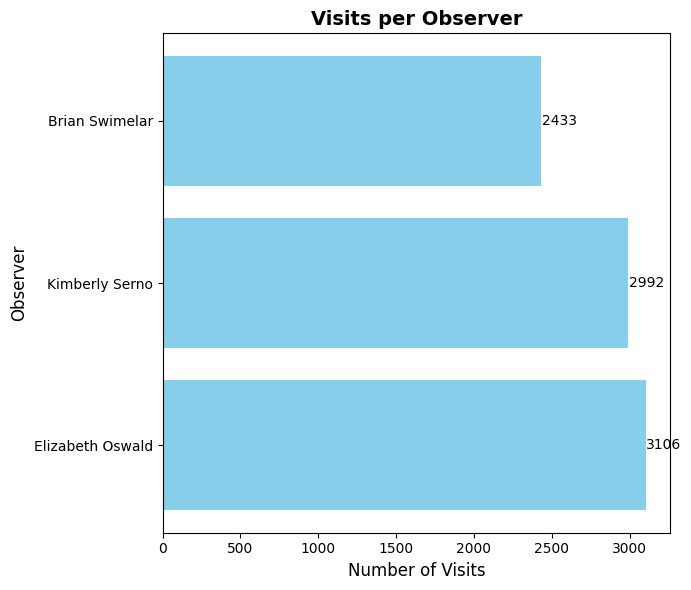

In [13]:
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(7, 6))

# Plot horizontal bar chart
plt.barh(observer_counts['Observer'], observer_counts['Visits'], color='skyblue')

# Styling
plt.title('Visits per Observer', fontsize=14, fontweight='bold')
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Observer', fontsize=12)

# Add data labels
for index, value in enumerate(observer_counts['Visits']):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)

# Adjust layout and show
plt.tight_layout()

# ✅ Make sure this is the last line executed
plt.show()

In [14]:
print(observer_counts.head())

           Observer  Visits
0  Elizabeth Oswald    3106
1    Kimberly Serno    2992
2    Brian Swimelar    2433


- Seasonal Visit Trends by Observer

In [15]:
# Aggregate bird sightings counts by Season and Year
seasonal_trends = Grassland.groupby(['Year', 'Season','Observer']).size().reset_index(name='Visit')
seasonal_trends

,Year,Season,Observer,Visit
0,2018,Spring,Brian Swimelar,888
1,2018,Spring,Elizabeth Oswald,1514
2,2018,Spring,Kimberly Serno,804
3,2018,Summer,Brian Swimelar,1545
4,2018,Summer,Elizabeth Oswald,1592
5,2018,Summer,Kimberly Serno,2188


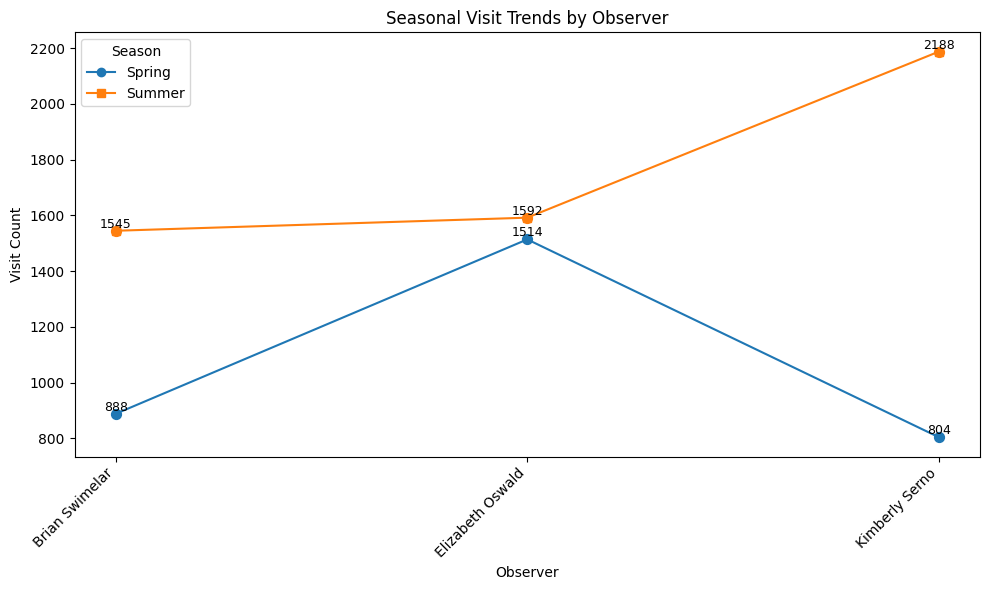

In [16]:
markers = {'Spring': 'o', 'Summer': 's'}

observers = seasonal_trends['Observer'].unique()
x_pos = np.arange(len(observers))

plt.figure(figsize=(10,6))

for season in seasonal_trends['Season'].unique():
    season_data = seasonal_trends[seasonal_trends['Season'] == season]
    y = []
    for obs in observers:
        visit = season_data[season_data['Observer'] == obs]['Visit']
        y.append(visit.values[0] if not visit.empty else np.nan)
    
    plt.plot(x_pos, y, marker=markers.get(season, 'o'), label=season)
    plt.scatter(x_pos, y, s=50)

    # Add labels for each data point
    for i, value in enumerate(y):
        if not np.isnan(value):
            plt.text(x_pos[i], value, str(value), fontsize=9, ha='center', va='bottom')

plt.xticks(x_pos, observers, rotation=45, ha='right')
plt.xlabel('Observer')
plt.ylabel('Visit Count')
plt.title('Seasonal Visit Trends by Observer')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

- Weekly Visit Counts by Observer

In [17]:
# Group by Observer and Weekday, then count
weekday_visits = Grassland.groupby(['Observer', 'WeekDay_Name']).size().reset_index(name='Visit')
weekday_visits.head()

,Observer,WeekDay_Name,Visit
0,Brian Swimelar,Friday,237
1,Brian Swimelar,Monday,573
2,Brian Swimelar,Saturday,148
3,Brian Swimelar,Sunday,18
4,Brian Swimelar,Thursday,416


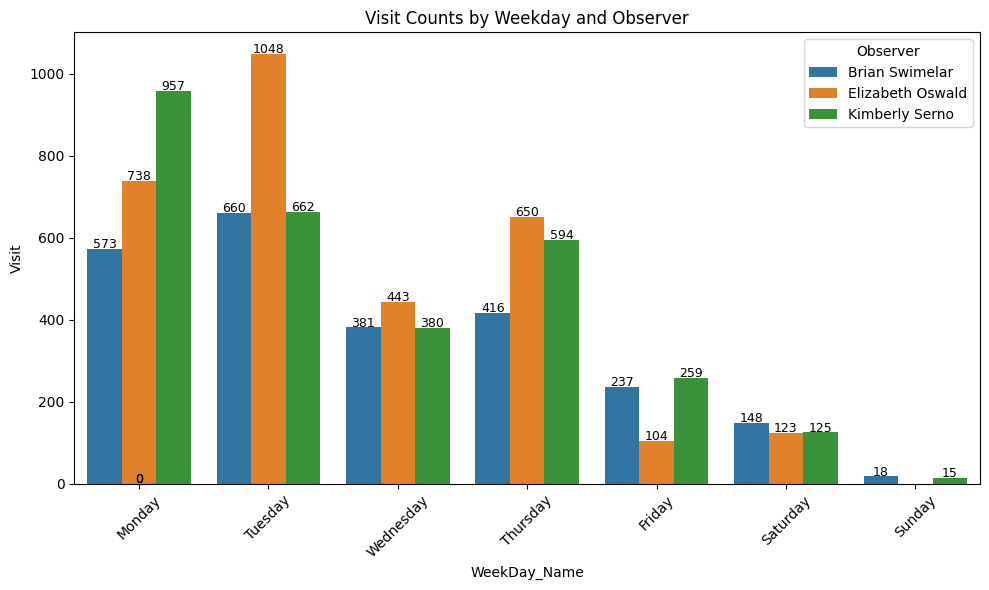

In [18]:
# Optional: order weekdays properly
natural_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_visits['WeekDay_Name'] = pd.Categorical(weekday_visits['WeekDay_Name'], categories=natural_order, ordered=True)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='WeekDay_Name', y='Visit', hue='Observer', data=weekday_visits)

# Loop over each bar and add the visit count on top
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
        height + 2,                     # y-position (slightly above the bar)
        int(height),                    # label text (visit count)
        ha='center',
        fontsize=9,
        color='black'
    )

plt.xticks(rotation=45)
plt.title('Visit Counts by Weekday and Observer')
plt.tight_layout()
plt.show()

- Weekly Visit Counts by Each Observer

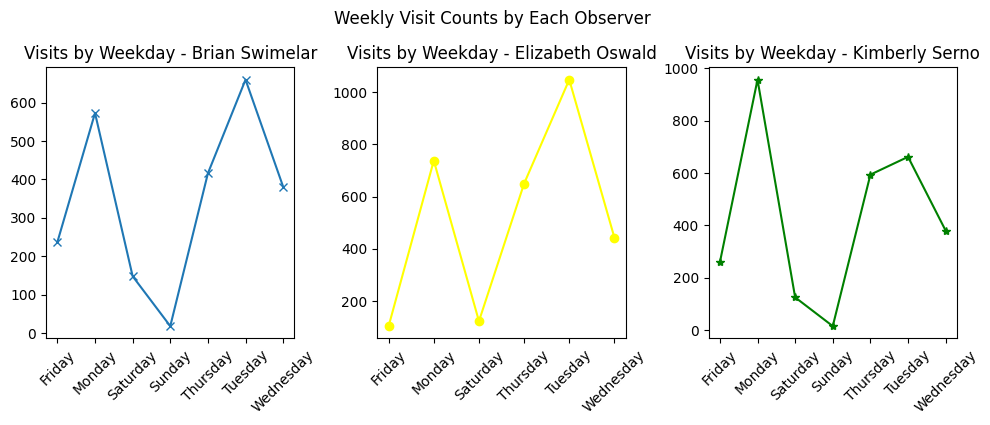

In [19]:
plt.figure(figsize=(10, 4))




plt.subplot(1,3,1)  # (row, columns, position)

# Select data for one observer, e.g. Brian Swimelar
obs_data = weekday_visits[weekday_visits['Observer'] == 'Brian Swimelar']
obs_data

observer_name = obs_data['Observer'].iloc[0]
plt.plot(obs_data['WeekDay_Name'], obs_data['Visit'], marker = 'x')
plt.xticks(rotation=45)
plt.title(f"Visits by Weekday - {observer_name}")





plt.subplot(1,3,2)  # (row, columns, position)

# Select data for one observer, e.g. Elizabeth Oswald
obs_data1 = weekday_visits[weekday_visits['Observer'] == 'Elizabeth Oswald']
# obs_data1

observer_name = obs_data1['Observer'].iloc[0]
plt.plot(obs_data1['WeekDay_Name'], obs_data1['Visit'],color='yellow', marker = 'o')
plt.xticks(rotation=45)
plt.title(f"Visits by Weekday - {observer_name}")



plt.subplot(1,3,3)  # (row, columns, position)

# Select data for one observer, e.g. Kimberly Serno
obs_data1 = weekday_visits[weekday_visits['Observer'] == 'Kimberly Serno']
# obs_data1

observer_name = obs_data1['Observer'].iloc[0]
plt.plot(obs_data1['WeekDay_Name'], obs_data1['Visit'],color='green', marker = '*')
plt.xticks(rotation=45)
plt.title(f"Visits by Weekday - {observer_name}")


plt.tight_layout()
plt.suptitle("Weekly Visit Counts by Each Observer ", y=1.05)
plt.show()

- No.Of.Visit Counts by Weekdays

C:\Users\dhars\AppData\Local\Temp\ipykernel_17800\1807376575.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='WeekDay_Name', y='Visit', data=weekday_visits, palette='Set2',ci=None )
C:\Users\dhars\AppData\Local\Temp\ipykernel_17800\1807376575.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='WeekDay_Name', y='Visit', data=weekday_visits, palette='Set2',ci=None )


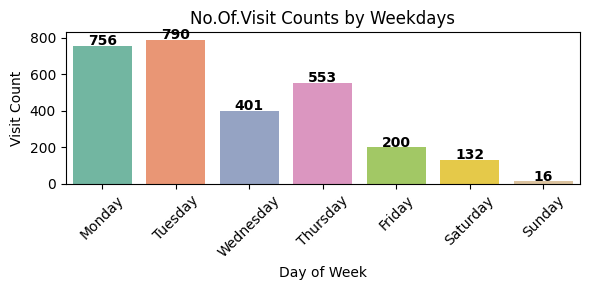

In [20]:
natural_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Only include weekdays that exist in your data, but keep Monday first
weekday_order = [day for day in natural_order if day in weekday_visits['WeekDay_Name'].unique()]

weekday_visits['WeekDay_Name'] = pd.Categorical(
    weekday_visits['WeekDay_Name'],
    categories=weekday_order,
    ordered=True
)
plt.figure(figsize=(6,3))

ax = sns.barplot(x='WeekDay_Name', y='Visit', data=weekday_visits, palette='Set2',ci=None )

# Loop over each bar and add the visit count on top
for p in ax.patches:
    height = p.get_height()
    ax.text(
    p.get_x() + p.get_width() / 2,
    height + 2,
    int(height),
    ha='center',
    fontsize=10,
    fontweight='bold',
    color='black'
)


plt.xlabel('Day of Week')
plt.ylabel('Visit Count')
plt.title('No.Of.Visit Counts by Weekdays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Top Weekday with Maximum Visits per Observer

In [21]:
# Find the index of the max visit for each observer
max_idx = weekday_visits.groupby('Observer')['Visit'].idxmax() # to find the row number (index) of the row that has the highest Visit count for each person.
# max_idx

# Use those indices to get the top rows
top_weekday_per_observer = weekday_visits.loc[max_idx].reset_index(drop=True) #Drop = True ,The old index is gone, and new default index (0, 1) is used

top_weekday_per_observer

,Observer,WeekDay_Name,Visit
0,Brian Swimelar,Tuesday,660
1,Elizabeth Oswald,Tuesday,1048
2,Kimberly Serno,Monday,957


**1. Temporal Analysis:**

> *Seasonal Trends: Analyze the Date and Year columns to detect patterns in bird sightings across different seasons or years?*

- Seasonal Visit Trends by Year & Seasons:

In [22]:
seasonal_trends = Grassland.groupby(['Year', 'Season']).size().reset_index(name='Visit')
seasonal_trends

,Year,Season,Visit
0,2018,Spring,3206
1,2018,Summer,5325


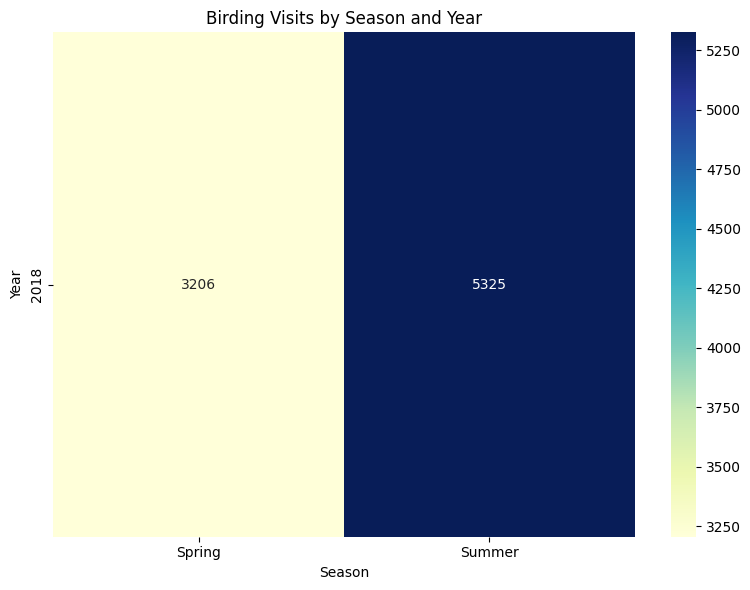

In [23]:
# Pivot table: rows = Year, columns = Season
heatmap_data = seasonal_trends.pivot(index='Year', columns='Season', values='Visit')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Birding Visits by Season and Year')
plt.xlabel('Season')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

> *Observation Time: Study the Start_Time and End_Time to determine if specific time windows correlate with higher bird activity?*

- Start_Hour_Count

In [24]:
Start_Hour_Count = Grassland["Start_Hour"].value_counts().sort_index()
Start_Hour_Count

Start_Hour
5      729
6     1882
7     2302
8     1557
9     1241
10     820
Name: count, dtype: int64

- End_Hour_Count

In [25]:
End_Hour_Count = Grassland["End_Hour"].value_counts().sort_index()
End_Hour_Count

End_Hour
5      419
6     1850
7     2322
8     1606
9     1329
10    1005
Name: count, dtype: int64

- hour_range

In [26]:
# hour_range = (Start_Hour_Count.index).union(End_Hour_Count.index)
# hour_range

# hour_range = set(Start_Hour_Count.index).union(End_Hour_Count.index)
# hour_range

hour_range = sorted(set(Start_Hour_Count.index).union(End_Hour_Count.index))
hour_range

[5, 6, 7, 8, 9, 10]

-  Combine the counts into a single DataFrame for easy plotting

In [27]:
# Combine the counts into a single DataFrame for easy plotting
df = pd.DataFrame({
    'Start_Hour_Count': Start_Hour_Count,
    'End_Hour_Count': End_Hour_Count
}, index=hour_range).fillna(0)

df

,Start_Hour_Count,End_Hour_Count
5,729,419
6,1882,1850
7,2302,2322
8,1557,1606
9,1241,1329
10,820,1005


In [28]:
# Format hours into "5AM", "6AM", ..., "5PM", etc.
formatted_hours = [f"{(h % 12) or 12}{'AM' if h < 12 else 'PM'}" for h in df.index] #h % 12: Converts 13 → 1, 14 → 2, ..., 23 → 11, and 0 → 0 or 12: Fixes the case for midnight (0) — because 0 % 12 gives 0, we use or 12 to make it 12
formatted_hours

['5AM', '6AM', '7AM', '8AM', '9AM', '10AM']

- Plotting

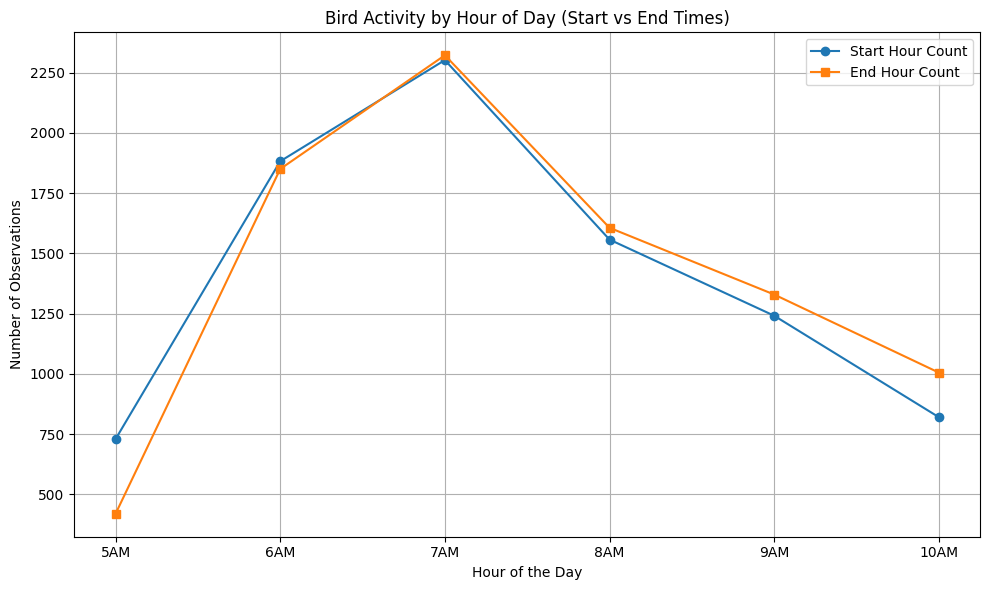

In [29]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(formatted_hours, df['Start_Hour_Count'], marker='o', label='Start Hour Count')
plt.plot(formatted_hours, df['End_Hour_Count'], marker='s', label='End Hour Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Observations')
plt.title('Bird Activity by Hour of Day (Start vs End Times)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Total Observation Time by Observer:

In [30]:
# Group by Observer and sum the durations to get total time spent per observer
observer_duration = Grassland.groupby('Observer')['Duration_Hours'].sum().sort_values(ascending=False)

# Convert to DataFrame and rename the column
observer_duration_df = observer_duration.reset_index().rename(columns={'Duration_Hours': 'Total_Duration_Hours'})

# Display the total hours each observer spent
observer_duration_df

,Observer,Total_Duration_Hours
0,Elizabeth Oswald,517.966667
1,Kimberly Serno,498.666667
2,Brian Swimelar,415.166667


In [31]:
import plotly.graph_objects as go

fig = go.Figure(go.Pie(
    labels=observer_duration_df['Observer'],
    values=observer_duration_df['Total_Duration_Hours'],
    hole=0.8
))

fig.update_layout(
    title_text='Total Observation Time by Observer',
    title_x=0.5  # center align
)

fig.show()

- - -

**2.	Spatial Analysis:**

> *Location Insights: Group data by Location_Type (e.g., Grassland) to identify biodiversity hotspots?*

In [32]:
# Group by Location_Type and count unique species
biodiversity_hotspots = Grassland.groupby('Location_Type')['Common_Name'].nunique().reset_index()
# biodiversity_hotspots

# Rename the column for clarity
biodiversity_hotspots.columns = ['Location_Type', 'Unique_Species_Count']
biodiversity_hotspots

,Location_Type,Unique_Species_Count
0,Grassland,107


- Unique Species Count by Location Type and Season:

In [33]:
Grassland['Season'].unique()

array(['Spring', 'Summer'], dtype=object)

In [34]:
# Filter spring and summer data
spring_data = Grassland[Grassland['Season'] == 'Spring']
summer_data = Grassland[Grassland['Season'] == 'Summer']

# Group Spring data by Location_Type and count unique species
spring_hotspots = spring_data.groupby('Location_Type')['Common_Name'].nunique().reset_index()
spring_hotspots.columns = ['Location_Type', 'Spring_Unique_Species_Count']
# print(spring_hotspots)

# Group Summer data by Location_Type and count unique species (optional)
summer_hotspots = summer_data.groupby('Location_Type')['Common_Name'].nunique().reset_index()
summer_hotspots.columns = ['Location_Type', 'Summer_Unique_Species_Count']
# summer_hotspots

# Merge spring and summer into one table
combined_hotspots = pd.merge(spring_hotspots, summer_hotspots, on='Location_Type', how='outer')

# Display combined table
combined_hotspots

,Location_Type,Spring_Unique_Species_Count,Summer_Unique_Species_Count
0,Grassland,96,86


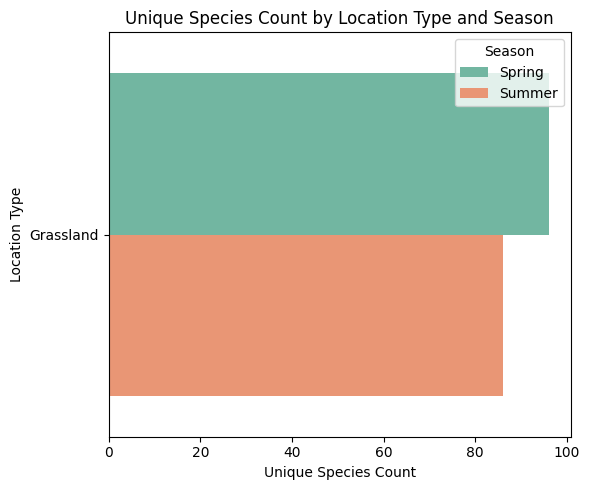

In [35]:
# Melt data to long format
melted = pd.melt(
    combined_hotspots,
    id_vars=['Location_Type'],
    value_vars=['Spring_Unique_Species_Count', 'Summer_Unique_Species_Count'],
    var_name='Season',
    value_name='Unique_Species_Count'
)

# Clean season names
melted['Season'] = melted['Season'].str.replace('_Unique_Species_Count', '')

# Plot horizontal bar chart
plt.figure(figsize=(6, 5))
sns.barplot(data=melted, y='Location_Type', x='Unique_Species_Count', hue='Season', palette='Set2')

plt.title('Unique Species Count by Location Type and Season')
plt.xlabel('Unique Species Count')
plt.ylabel('Location Type')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

- Rare Species Count by Location Type (PIF Watchlist):

In [36]:
# Identify rare species from PIF Watchlist
rare_species = Grassland[Grassland['PIF_Watchlist_Status'] == True]
rare_species.head()

# Count how many rare species observed per Location_Type
rare_by_location = rare_species.groupby('Location_Type')['Common_Name'].nunique().reset_index()
rare_by_location

rare_by_location.columns = ['Location_Type', 'Rare_Species_Count']
rare_by_location

,Location_Type,Rare_Species_Count
0,Grassland,4


C:\Users\dhars\AppData\Local\Temp\ipykernel_17800\2062331906.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




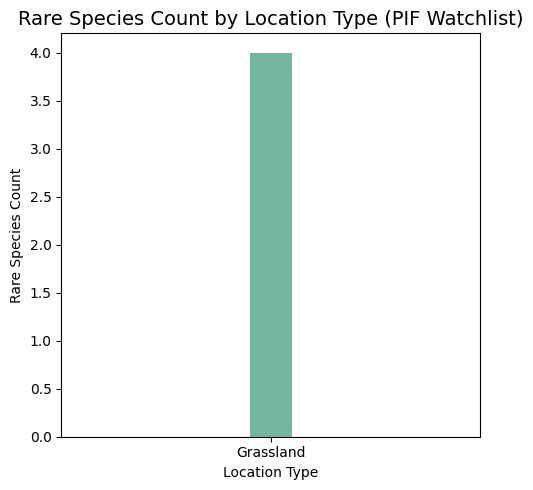

In [37]:
# Create bar plot
plt.figure(figsize=(5, 5))
sns.barplot(data=rare_by_location, x='Location_Type', y='Rare_Species_Count', palette='Set2', width = 0.1)

plt.title('Rare Species Count by Location Type (PIF Watchlist)', fontsize=14)
plt.xlabel('Location Type')
plt.ylabel('Rare Species Count')
plt.tight_layout()
plt.show()

> *Plot-Level Analysis: Compare observations across different Plot_Name to see which plots attract more species or specific kinds of birds?*

In [38]:
# Group by Plot_Name or Site_Name and count unique species
hotspots_by_plot = Grassland.groupby('Plot_Name')['Common_Name'].nunique().reset_index()
hotspots_by_plot.columns = ['Plot_Name', 'Unique_Species_Count']
hotspots_by_plot = hotspots_by_plot.sort_values(by='Unique_Species_Count', ascending=False)

# hotspots_by_plot
print(hotspots_by_plot.head(10))  # Top 10 Grassland plots with most species


     Plot_Name  Unique_Species_Count
33   ANTI-0105                    27
166  MONO-0057                    27
94   MANA-0047                    27
95   MANA-0048                    26
186  MONO-0085                    26
181  MONO-0076                    26
173  MONO-0066                    26
68   ANTI-0160                    25
22   ANTI-0077                    25
10   ANTI-0034                    25


C:\Users\dhars\AppData\Local\Temp\ipykernel_17800\171830766.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




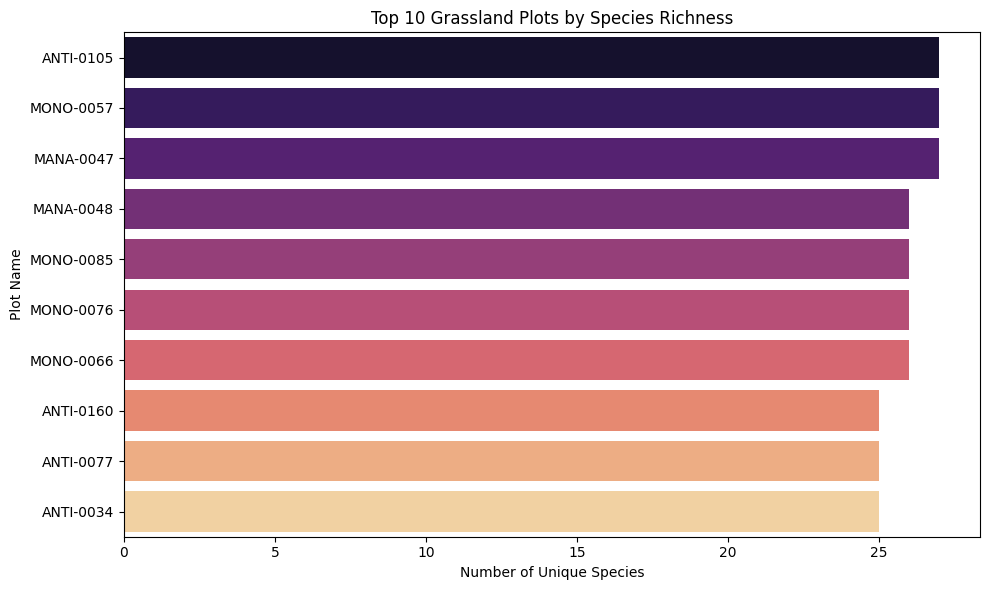

In [39]:
# Show top 10 plots only
top_hotspots = hotspots_by_plot.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_hotspots, x='Unique_Species_Count', y='Plot_Name', palette='magma')
plt.title('Top 10 Grassland Plots by Species Richness')
plt.xlabel('Number of Unique Species')
plt.ylabel('Plot Name')
plt.tight_layout()
plt.show()

**3. Species Analysis:**

> *Diversity Metrics: Count unique species (Scientific_Name) observed and their distribution across Location_Type?*

In [40]:
# Group by Location_Type and count unique species by Scientific_Name
species_distribution = Grassland.groupby('Location_Type')['Scientific_Name'].nunique()
# print(species_distribution,'\n')

species_distribution = Grassland.groupby('Location_Type')['Scientific_Name'].nunique().reset_index()
# print(species_distribution,'\n')

# Rename columns for clarity
species_distribution.columns = ['Location_Type', 'Unique_Species_Count']
species_distribution

,Location_Type,Unique_Species_Count
0,Grassland,107


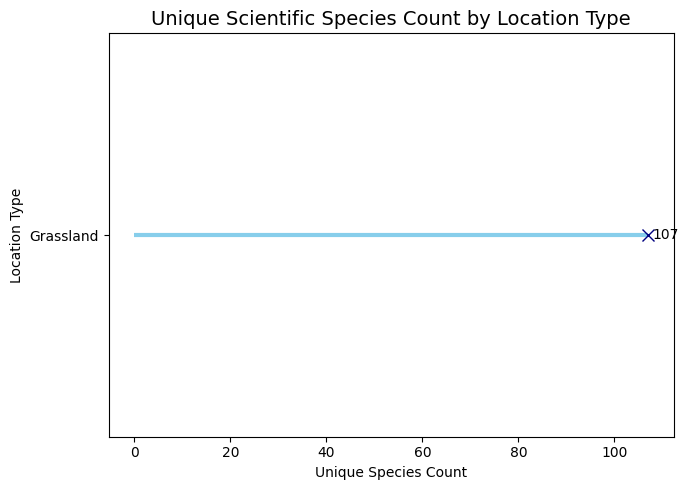

In [41]:
# Sort values for cleaner plot
species_distribution_sorted = species_distribution.sort_values(by='Unique_Species_Count', ascending=True)

plt.figure(figsize=(7, 5))
plt.hlines(y=species_distribution['Location_Type'], 
           xmin=0,
           xmax=species_distribution_sorted['Unique_Species_Count'], 
           color='skyblue', linewidth=3)
plt.plot(species_distribution_sorted['Unique_Species_Count'], species_distribution_sorted['Location_Type'],
                  marker = "x", markersize=8, color='navy')

# Add labels
for i, (val, label) in enumerate(zip(species_distribution_sorted['Unique_Species_Count'], species_distribution_sorted['Location_Type'])):
    plt.text(val + 1, i, str(val), va='center', fontsize=10)

plt.title("Unique Scientific Species Count by Location Type", fontsize=14)
plt.xlabel("Unique Species Count")
plt.ylabel("Location Type")
plt.tight_layout()
plt.show()

> *Activity Patterns: Check the Interval_Length and ID_Method columns to identify the most common activity types (e.g., Singing)?*

In [42]:
Grassland['ID_Method'].unique()

array(['Singing', 'Calling', 'Visualization'], dtype=object)

In [43]:
Grassland['Interval_Length'].unique()

array(['0-2.5 min', '7.5 - 10 min', '2.5 - 5 min', '5 - 7.5 min'],
      dtype=object)

- Count of Bird ID Methods

       ID_Method  Count
0        Singing   4434
1  Visualization   2713
2        Calling   1384 



C:\Users\dhars\AppData\Local\Temp\ipykernel_17800\1798357143.py:9: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



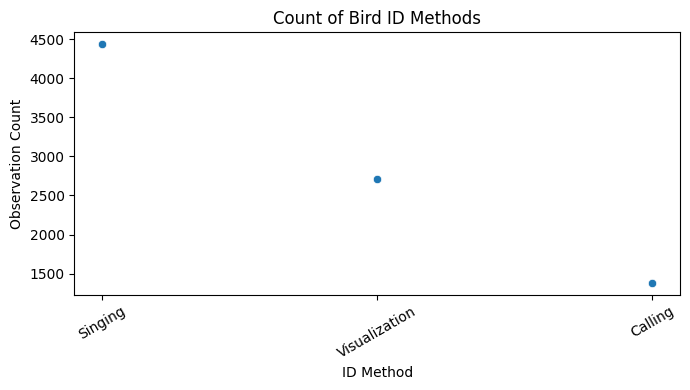

In [44]:
# Count occurrences of each ID method
id_method_counts = Grassland['ID_Method'].value_counts().reset_index()
id_method_counts.columns = ['ID_Method', 'Count']
print(id_method_counts, '\n')


# Plotting the ID method counts
plt.figure(figsize=(7, 4))
sns.scatterplot(data=id_method_counts, x='ID_Method', y='Count', palette='muted')

# Customizing the plot
plt.title('Count of Bird ID Methods')
plt.xlabel('ID Method')
plt.ylabel('Observation Count')
plt.xticks(rotation=30)
plt.tight_layout()

# Show the plot
plt.show()

- Most Common Interval Lengths

  Interval_Length  Count
0       0-2.5 min   4204
1     2.5 - 5 min   1688
2     5 - 7.5 min   1425
3    7.5 - 10 min   1214 



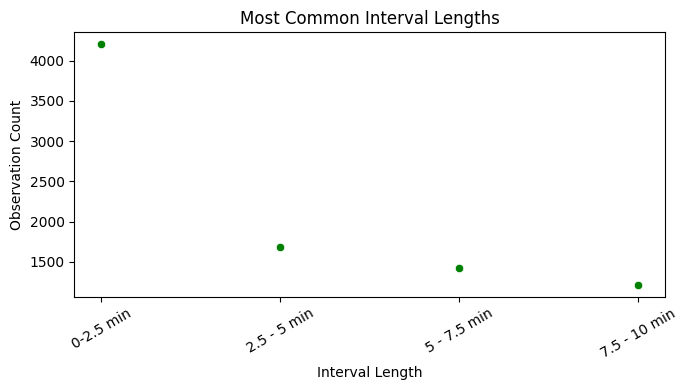

In [45]:
# Count occurrences of each Interval Length
interval_counts = Grassland['Interval_Length'].value_counts().reset_index()
interval_counts.columns = ['Interval_Length', 'Count']
print(interval_counts, '\n')


# Plotting the Interval_Length counts
plt.figure(figsize=(7, 4))
sns.scatterplot(data=interval_counts, x='Interval_Length', y='Count', color='Green')

# Customizing the plot
plt.title('Most Common Interval Lengths')
plt.xlabel('Interval Length')
plt.ylabel('Observation Count')
plt.xticks(rotation=30)
plt.tight_layout()

# Show the plot
plt.show()

- Observation Counts by Activity Type and Interval:

In [46]:
#Most Common Bird ID Method & Interval:
combined_counts = Grassland.groupby(['Interval_Length', 'ID_Method']).size().reset_index(name='Count')
combined_counts = combined_counts.sort_values(by='Count', ascending=False)
print(combined_counts.head(10))  # Show top 10 combinations

   Interval_Length      ID_Method  Count
1        0-2.5 min        Singing   2591
2        0-2.5 min  Visualization   1004
4      2.5 - 5 min        Singing    842
8      5 - 7.5 min  Visualization    656
0        0-2.5 min        Calling    609
11    7.5 - 10 min  Visualization    544
7      5 - 7.5 min        Singing    533
5      2.5 - 5 min  Visualization    509
10    7.5 - 10 min        Singing    468
3      2.5 - 5 min        Calling    337


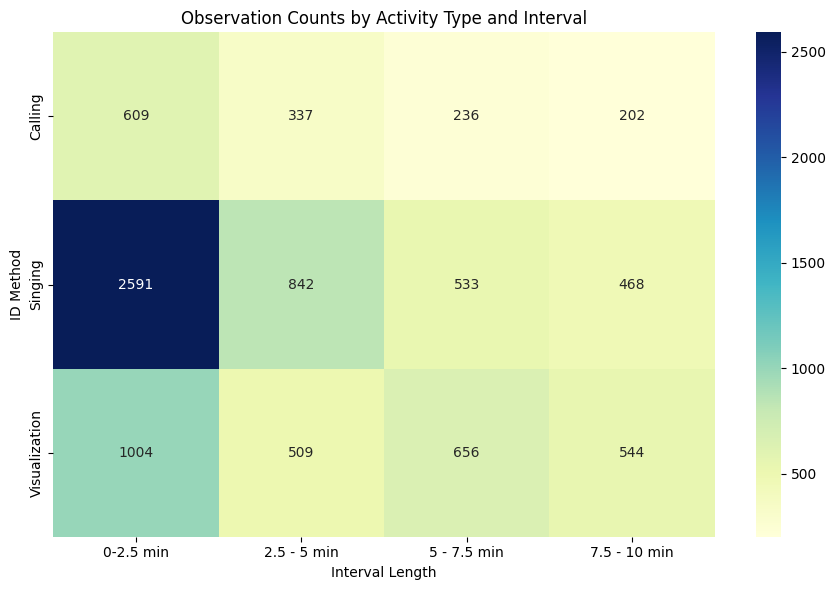

In [47]:
pivot_table = combined_counts.pivot(index='ID_Method', columns='Interval_Length', values='Count').fillna(0)

plt.figure(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Observation Counts by Activity Type and Interval')
plt.xlabel('Interval Length')
plt.ylabel('ID Method')
plt.tight_layout()
plt.show()

> *Sex Ratio: Analyze the Sex column to understand the male-to-female ratio for different species?*

- Grassland Bird Sex Ratio Breakdown

In [48]:
Grassland_sex_ratio = Grassland['Sex'].value_counts().reset_index()
# Grassland_sex_ratio

Grassland_sex_ratio.columns = ['Sex', 'Count']
Grassland_sex_ratio

,Sex,Count
0,Undetermined,5106
1,Male,3279
2,Female,146


In [49]:
fig = px.pie(Grassland_sex_ratio, names='Sex', values='Count', title='Sex Distribution in Grassland Birds')
fig.show()

- Sex and Species Composition of Grassland Birds:

In [50]:
species_sex_counts = Grassland.groupby(['Scientific_Name', 'Sex']).size()
# species_sex_counts

species_sex_counts = species_sex_counts.reset_index()
# species_sex_counts

species_sex_counts.columns = ['Scientific_Name', 'Sex', 'Count']
species_sex_counts

species_sex_counts.sort_values(by = 'Count', ascending= False)

,Scientific_Name,Sex,Count
142,Sturnus vulgaris,Undetermined,516
20,Cardinalis cardinalis,Undetermined,501
135,Spizella pusilla,Male,490
94,Passerina cyanea,Male,473
146,Thryothorus ludovicianus,Undetermined,365
5,Ammodramus savannarum,Male,355
133,Spizella passerina,Male,342
12,Bombycilla cedrorum,Undetermined,302
23,Carduelis tristis,Undetermined,286
63,Hirundo rustica,Undetermined,260


In [51]:
fig = px.sunburst(species_sex_counts, path=['Sex','Scientific_Name'], values='Count',
                  title='Sex and Species Distribution of Grassland Birds')
fig.show()

**4. Environmental Conditions:**

> *Weather Correlation: Explore how Temperature, Humidity, Sky, and Wind impact observations, such as the number of birds or their distances?*

- Weather Factors & Bird Observations:

In [52]:
df = Grassland.loc[:,['Temperature', 'Humidity', 'Sky', 'Wind', 'Common_Name','Distance']]
df.head()

,Temperature,Humidity,Sky,Wind,Common_Name,Distance
0,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Chipping Sparrow,50 - 100 Meters
1,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Eastern Bluebird,50 - 100 Meters
2,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Grasshopper Sparrow,<= 50 Meters
3,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Eastern Bluebird,50 - 100 Meters
4,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Field Sparrow,50 - 100 Meters


In [53]:
or_en = OrdinalEncoder()      

df['Common_Name'] = or_en.fit_transform(df[['Common_Name']])
df['Sky'] = or_en.fit_transform(df[['Sky']])
df['Wind'] = or_en.fit_transform(df[['Wind']])
df['Distance'] = or_en.fit_transform(df[['Distance']])
df.head()

,Temperature,Humidity,Sky,Wind,Common_Name,Distance
0,20.0,79.0,1.0,3.0,30.0,1.0
1,20.0,79.0,1.0,3.0,35.0,1.0
2,20.0,79.0,1.0,3.0,45.0,2.0
3,20.0,79.0,1.0,3.0,35.0,1.0
4,20.0,79.0,1.0,3.0,43.0,1.0


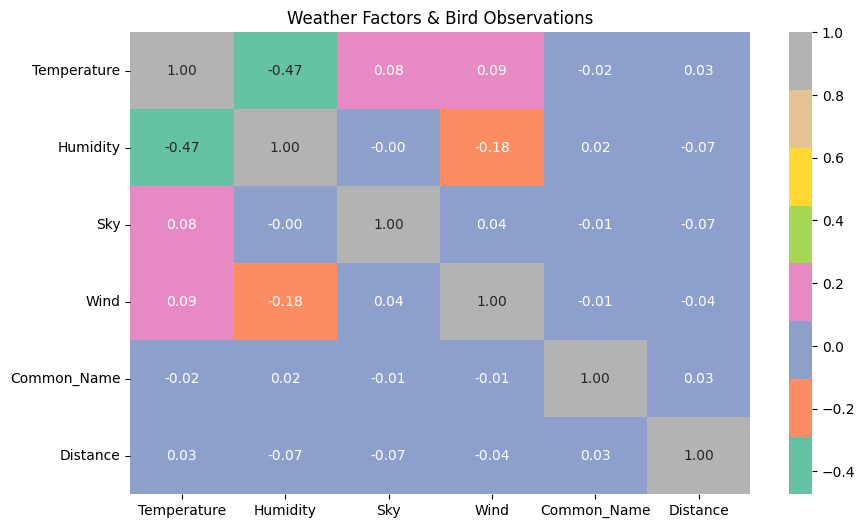

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="Set2", fmt=".2f")
plt.title("Weather Factors & Bird Observations")
plt.show()

- Distribution plot of Temperature by Distance:

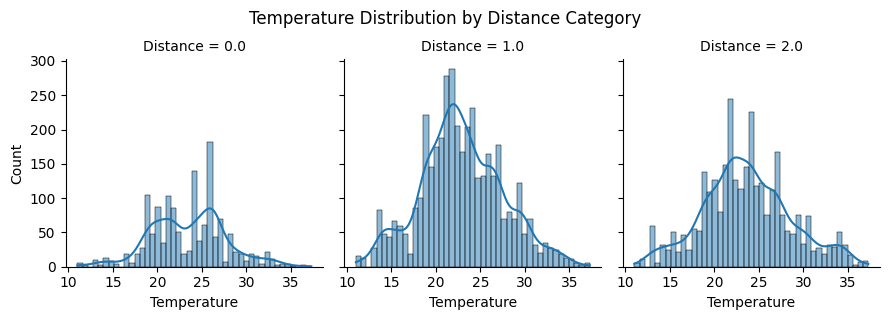

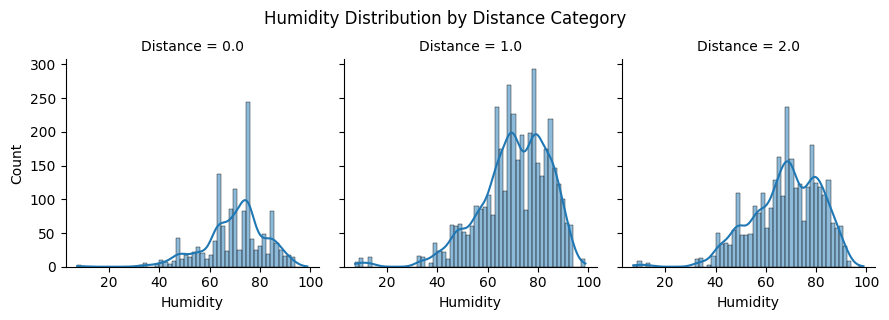

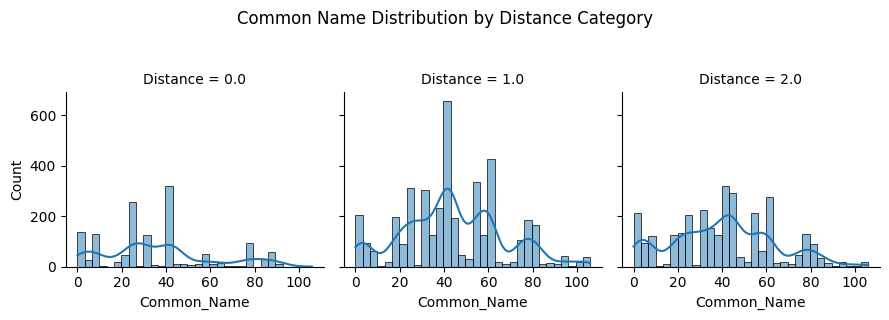

In [55]:
# Create distribution plots of Temperature, one for each Distance category
sns.displot(data=df,x='Temperature',col='Distance', # Creates one subplot per distance category
    kde=True,          # Adds a smooth distribution curve
    height=3,aspect=1)
plt.suptitle('Temperature Distribution by Distance Category', y=1.05)


sns.displot(data=df,x='Humidity',col='Distance',kde=True,height=3,aspect=1)
plt.suptitle('Humidity Distribution by Distance Category', y=1.05)

sns.displot(data=df,x='Common_Name',col='Distance',kde=True,height=3,aspect=1)
plt.suptitle('Common Name Distribution by Distance Category', y=1.05)

plt.tight_layout()
plt.show()

- Distribution plot of Temperature by Sky:

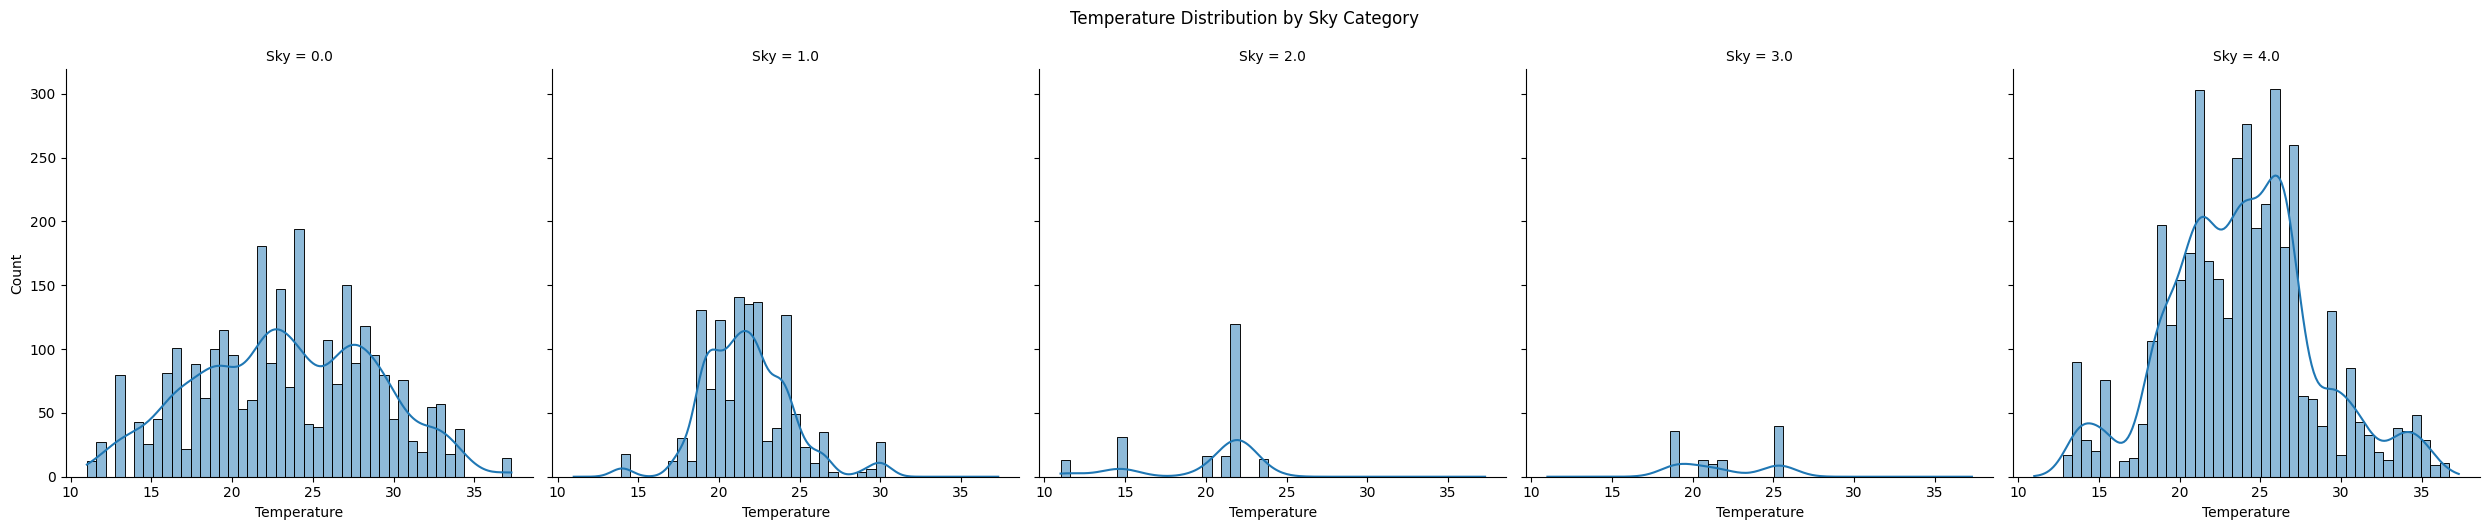

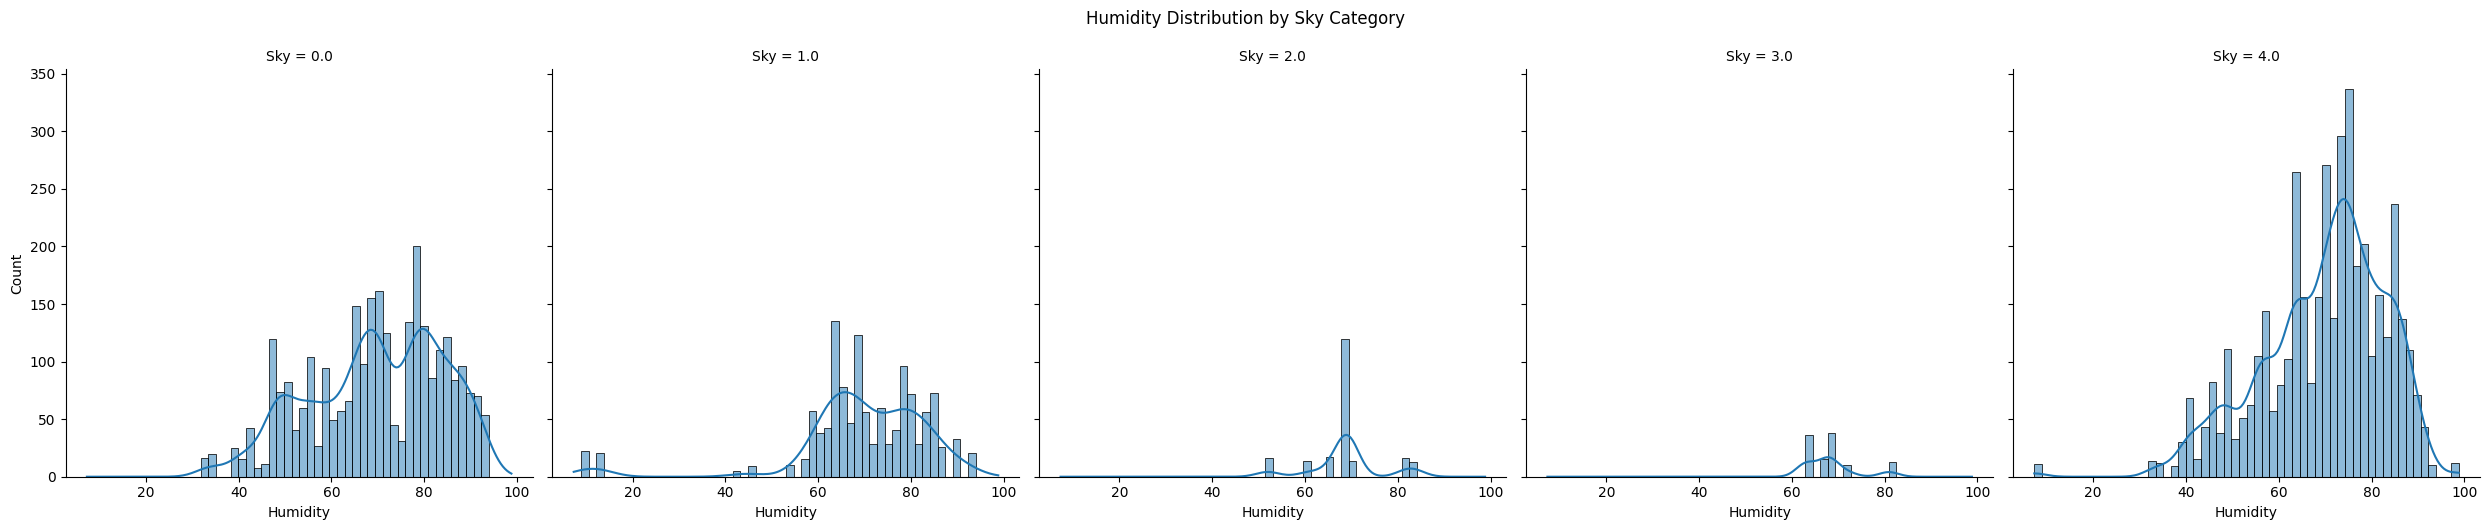

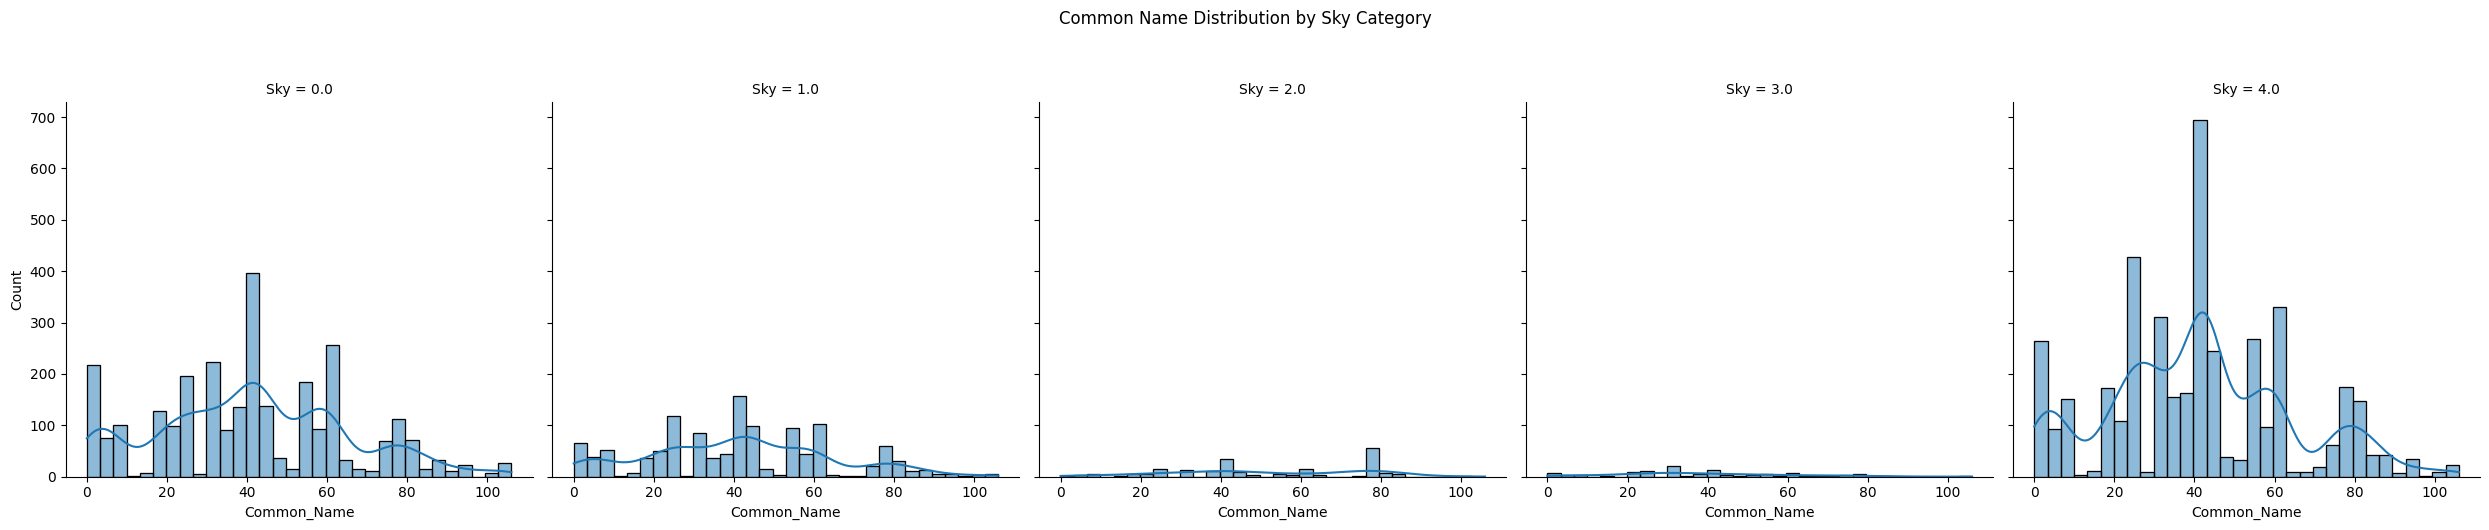

In [56]:
sns.displot(data = df,
            x='Temperature', #x -> numerical values
            col='Sky', #col -> is like category ()
            kde=True)

plt.suptitle('Temperature Distribution by Sky Category', y=1.05)

sns.displot(data = df,
            x='Humidity', #x -> numerical values
            col='Sky', #col -> is like category ()
            kde=True)

plt.suptitle('Humidity Distribution by Sky Category', y=1.05)

sns.displot(data = df,
            x='Common_Name', #x -> numerical values
            col='Sky', #col -> is like category ()
            kde=True)

plt.suptitle('Common Name Distribution by Sky Category', y=1.05)
plt.tight_layout()
plt.show()
plt.show()

- Distribution plot of Temperature by Wind:

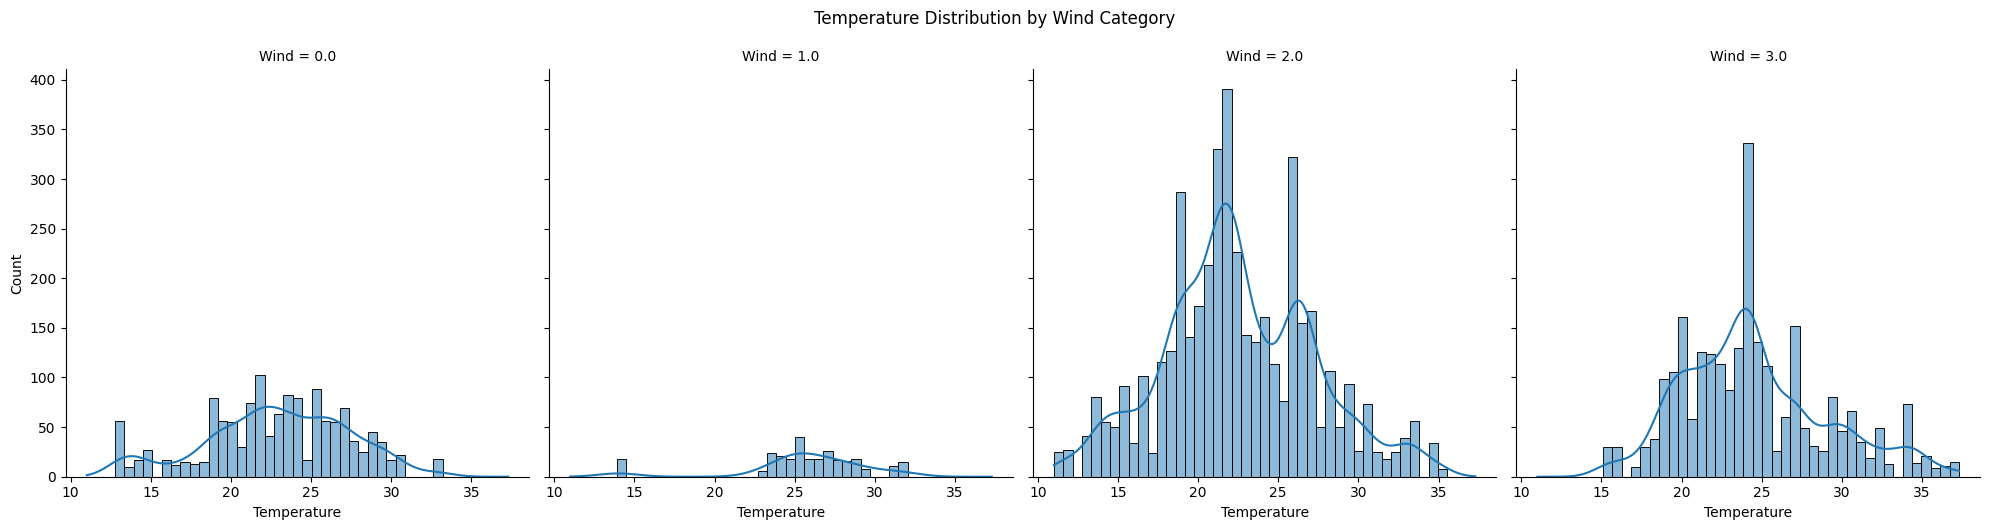

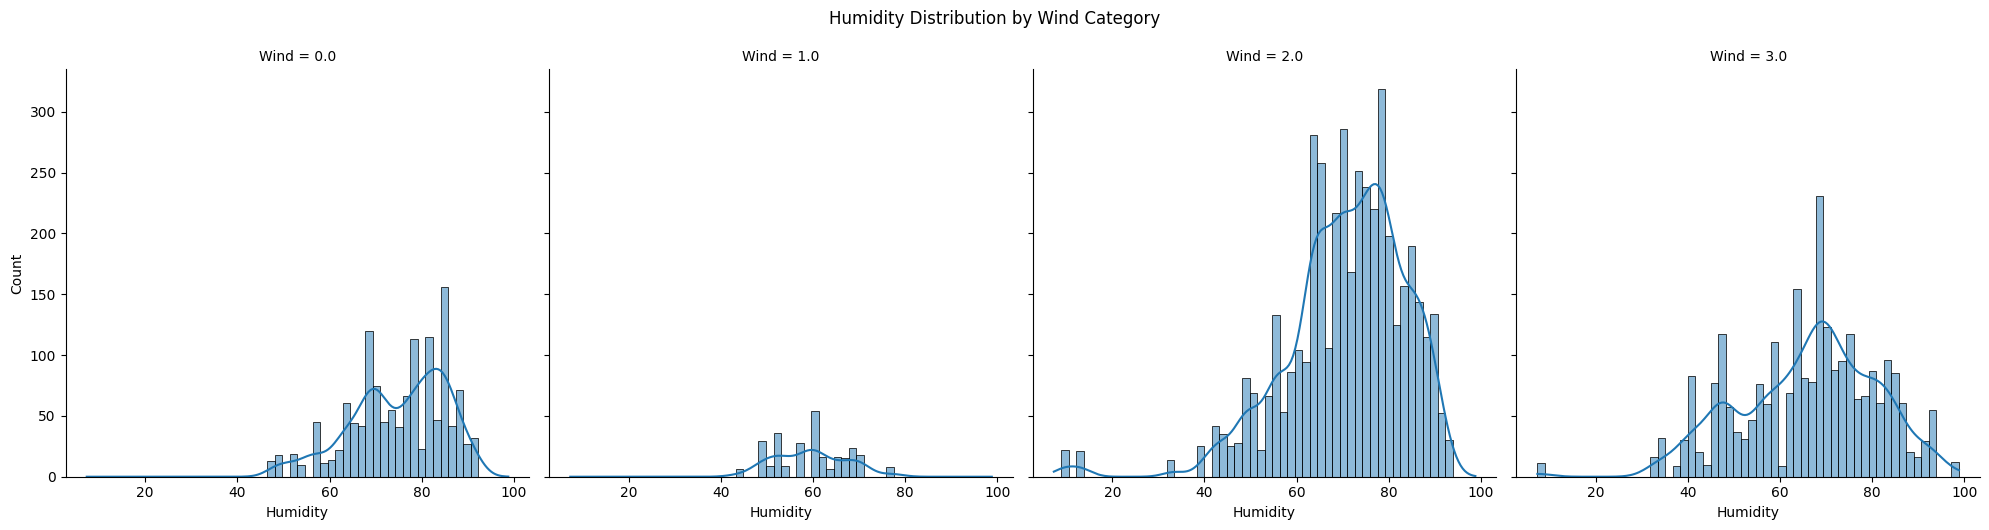

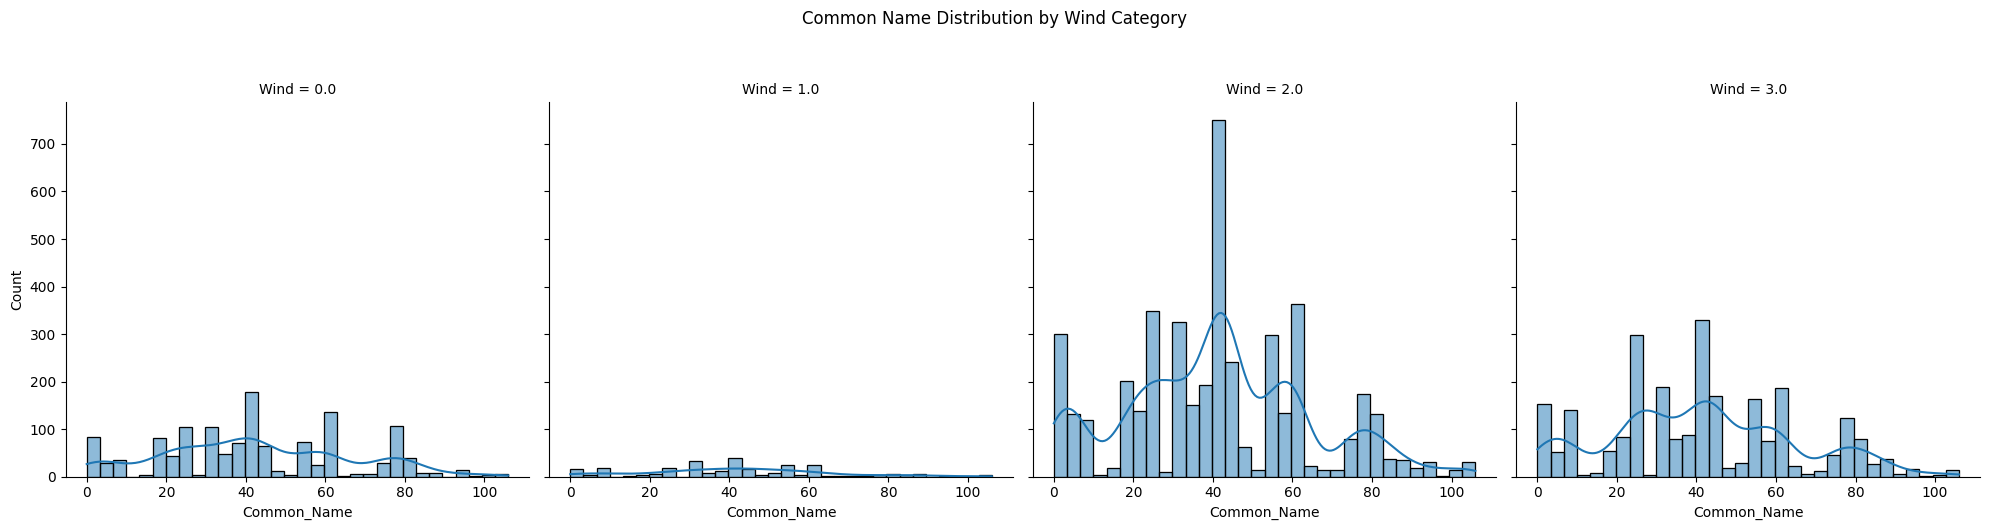

In [57]:
sns.displot(data = df, x='Temperature',col='Wind',kde=True)
plt.suptitle('Temperature Distribution by Wind Category', y=1.05)

sns.displot(data = df, x='Humidity',col='Wind',kde=True)
plt.suptitle('Humidity Distribution by Wind Category', y=1.05)

sns.displot(data = df, x='Common_Name',col='Wind',kde=True)
plt.suptitle('Common Name Distribution by Wind Category', y=1.05)
plt.tight_layout()
plt.show()

>*Disturbance Effect: Assess the impact of Disturbance (e.g., slight effect) on bird sightings?*

In [58]:
Grassland['Disturbance'].unique()

array(['Slight effect on count', 'No effect on count',
       'Moderate effect on count', 'Serious effect on count'],
      dtype=object)

- Proportion of Bird Sightings by Disturbance Type:

In [59]:
Grassland_Disturbance = Grassland['Disturbance'].value_counts().reset_index()
Grassland_Disturbance

Grassland_Disturbance.columns = ['Disturbance','Disturbance_Count']
Grassland_Disturbance

,Disturbance,Disturbance_Count
0,Slight effect on count,4059
1,No effect on count,3176
2,Moderate effect on count,1008
3,Serious effect on count,288


In [60]:
fig = go.Figure(
    go.Pie(
        labels=Grassland_Disturbance['Disturbance'],
        values=Grassland_Disturbance['Disturbance_Count'],
        hole=0.6,
        marker=dict(colors=px.colors.qualitative.Set2)
    )
)

fig.update_layout(
    title_text='Proportion of Bird Sightings by Disturbance Type',
    annotations=[dict(text='Disturbance', x=0.5, y=0.5, font_size=14, showarrow=False)]
)

fig.show()

**5. Distance and Behavior**

>*Distance Analysis: Evaluate the Distance column to identify species typically observed closer or farther from the observer?*

In [61]:
Grassland['Distance'].unique()

array(['50 - 100 Meters', '<= 50 Meters', '0 Meters'], dtype=object)

In [62]:
Grassland['Observer'].unique()

array(['Elizabeth Oswald', 'Kimberly Serno', 'Brian Swimelar'],
      dtype=object)

In [63]:
distance_species_counts = Grassland.groupby(['Observer','Distance','Common_Name']).size().reset_index(name='Obeserver_Distamce_Count')
distance_species_counts.head()

,Observer,Distance,Common_Name,Obeserver_Distamce_Count
0,Brian Swimelar,0 Meters,American Crow,13
1,Brian Swimelar,0 Meters,American Goldfinch,21
2,Brian Swimelar,0 Meters,American Robin,4
3,Brian Swimelar,0 Meters,Bald Eagle,1
4,Brian Swimelar,0 Meters,Barn Swallow,111


- Bird Species Observation by Distance and Observer:

In [64]:
fig = px.bar(distance_species_counts,
    x='Common_Name',
    y='Obeserver_Distamce_Count',
    color='Distance',
    facet_col='Observer',
    title='Bird Species Observation by Distance and Observer',
    labels={'Common_Name': 'Species', 'Count': 'Observation Count'},
    height=600
)
fig.show()

>*Flyover Frequency: Examine the Flyover_Observed column to detect trends in bird behavior during observation?*

In [65]:
Grassland['Flyover_Observed'].unique()

array([False,  True])

- Frequency of Bird Flyovers:

In [66]:
flyover_counts = Grassland['Flyover_Observed'].value_counts()
flyover_counts = flyover_counts.reset_index()
flyover_counts

,Flyover_Observed,count
0,False,7137
1,True,1394


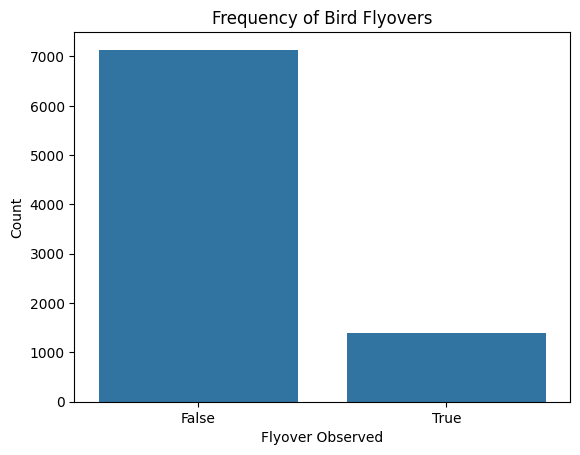

In [67]:
sns.countplot(data=Grassland, x='Flyover_Observed')
plt.title('Frequency of Bird Flyovers')
plt.xlabel('Flyover Observed')
plt.ylabel('Count')
plt.show()

- Flyover by Species:

In [68]:
flyover_by_species = Grassland.groupby(['Common_Name', 'Flyover_Observed']).size().reset_index(name='Count')
flyover_by_species.head()

,Common_Name,Flyover_Observed,Count
0,Acadian Flycatcher,False,26
1,American Crow,False,127
2,American Crow,True,32
3,American Goldfinch,False,261
4,American Goldfinch,True,101


In [69]:
fig = px.bar(flyover_by_species, x='Common_Name', y='Count', color='Flyover_Observed',
             title='Flyover Observations by Species',
             labels={'Common_Name': 'Species', 'Count': 'Observations'},
             barmode='group')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

- Flyovers vs. Weather Conditions

- - Temperature Distribution by Flyover Observation:

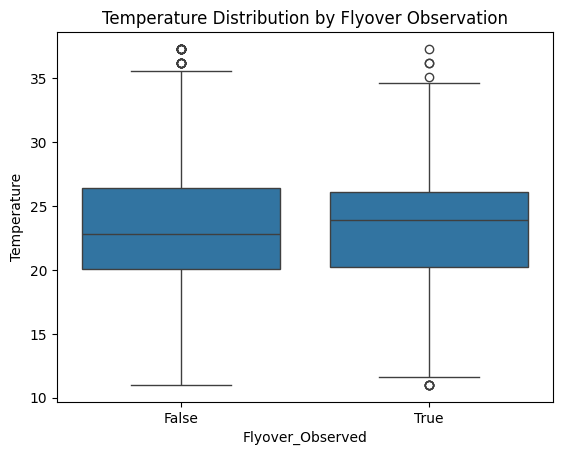

In [70]:
sns.boxplot(data=Grassland, x='Flyover_Observed', y='Temperature')
plt.title('Temperature Distribution by Flyover Observation')
plt.show()

- - Flyover Observation Frequency by Sky Condition:

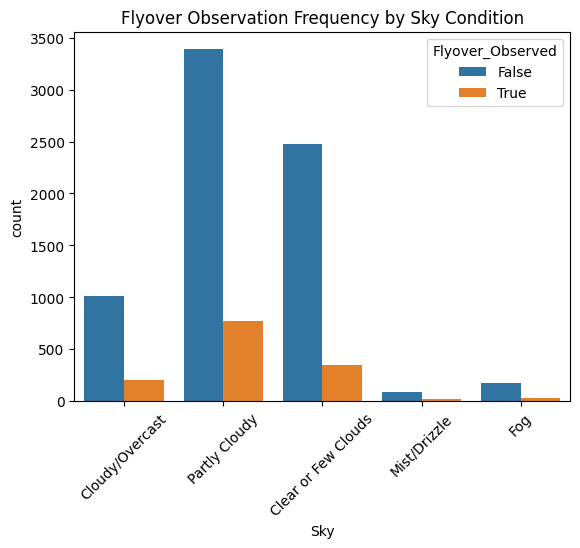

In [71]:
sns.countplot(data=Grassland, x='Sky', hue='Flyover_Observed')
plt.title('Flyover Observation Frequency by Sky Condition')
plt.xticks(rotation=45)
plt.show()

- - Flyover Observations Over Time:

In [72]:
flyover_over_time = Grassland.groupby(['Date', 'Flyover_Observed']).size().reset_index(name='Count')
fig = px.line(flyover_over_time, x='Date', y='Count', color='Flyover_Observed',
              title='Flyover Observations Over Time')
fig.show()

**6. Observer Trends**

>*Observer Bias: Analyze data by Observer to check if specific individuals report more observations or certain species?*

- - Number of Observations by Each Observer

C:\Users\dhars\AppData\Local\Temp\ipykernel_17800\3660261576.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




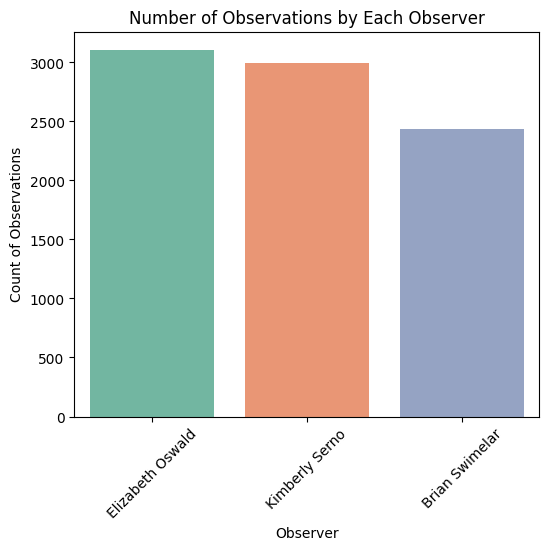

In [73]:
plt.figure(figsize=(6, 5))
sns.countplot(data=Grassland, x="Observer", order=Grassland["Observer"].value_counts().index, palette="Set2")

plt.title("Number of Observations by Each Observer")
plt.xlabel("Observer")
plt.ylabel("Count of Observations")
plt.xticks(rotation=45)
plt.show()

- - Species Diversity per Observer:

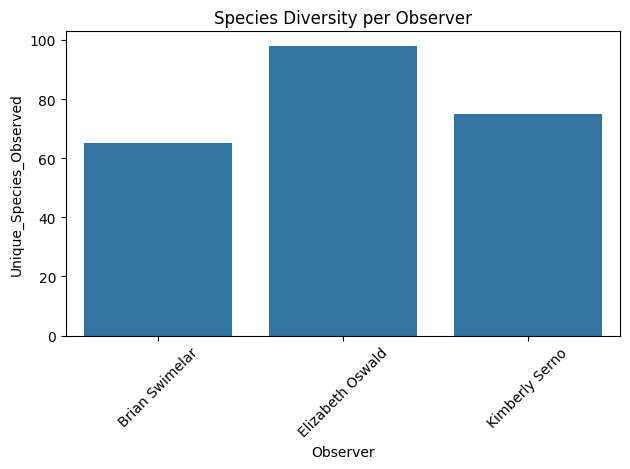

In [74]:
species_per_observer = Grassland.groupby('Observer')['Common_Name'].nunique().reset_index()
species_per_observer.columns = ['Observer', 'Unique_Species_Observed']

sns.barplot(data=species_per_observer, x='Observer', y='Unique_Species_Observed')
plt.title('Species Diversity per Observer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- - Species Observed by Each Observer

In [75]:
obs_species_counts = Grassland.groupby(['Observer', 'Common_Name']).size().reset_index(name='Count')
obs_species_counts.head()

,Observer,Common_Name,Count
0,Brian Swimelar,Acadian Flycatcher,6
1,Brian Swimelar,American Crow,72
2,Brian Swimelar,American Goldfinch,65
3,Brian Swimelar,American Redstart,3
4,Brian Swimelar,American Robin,54


C:\Users\dhars\AppData\Local\Temp\ipykernel_17800\149903608.py:8: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



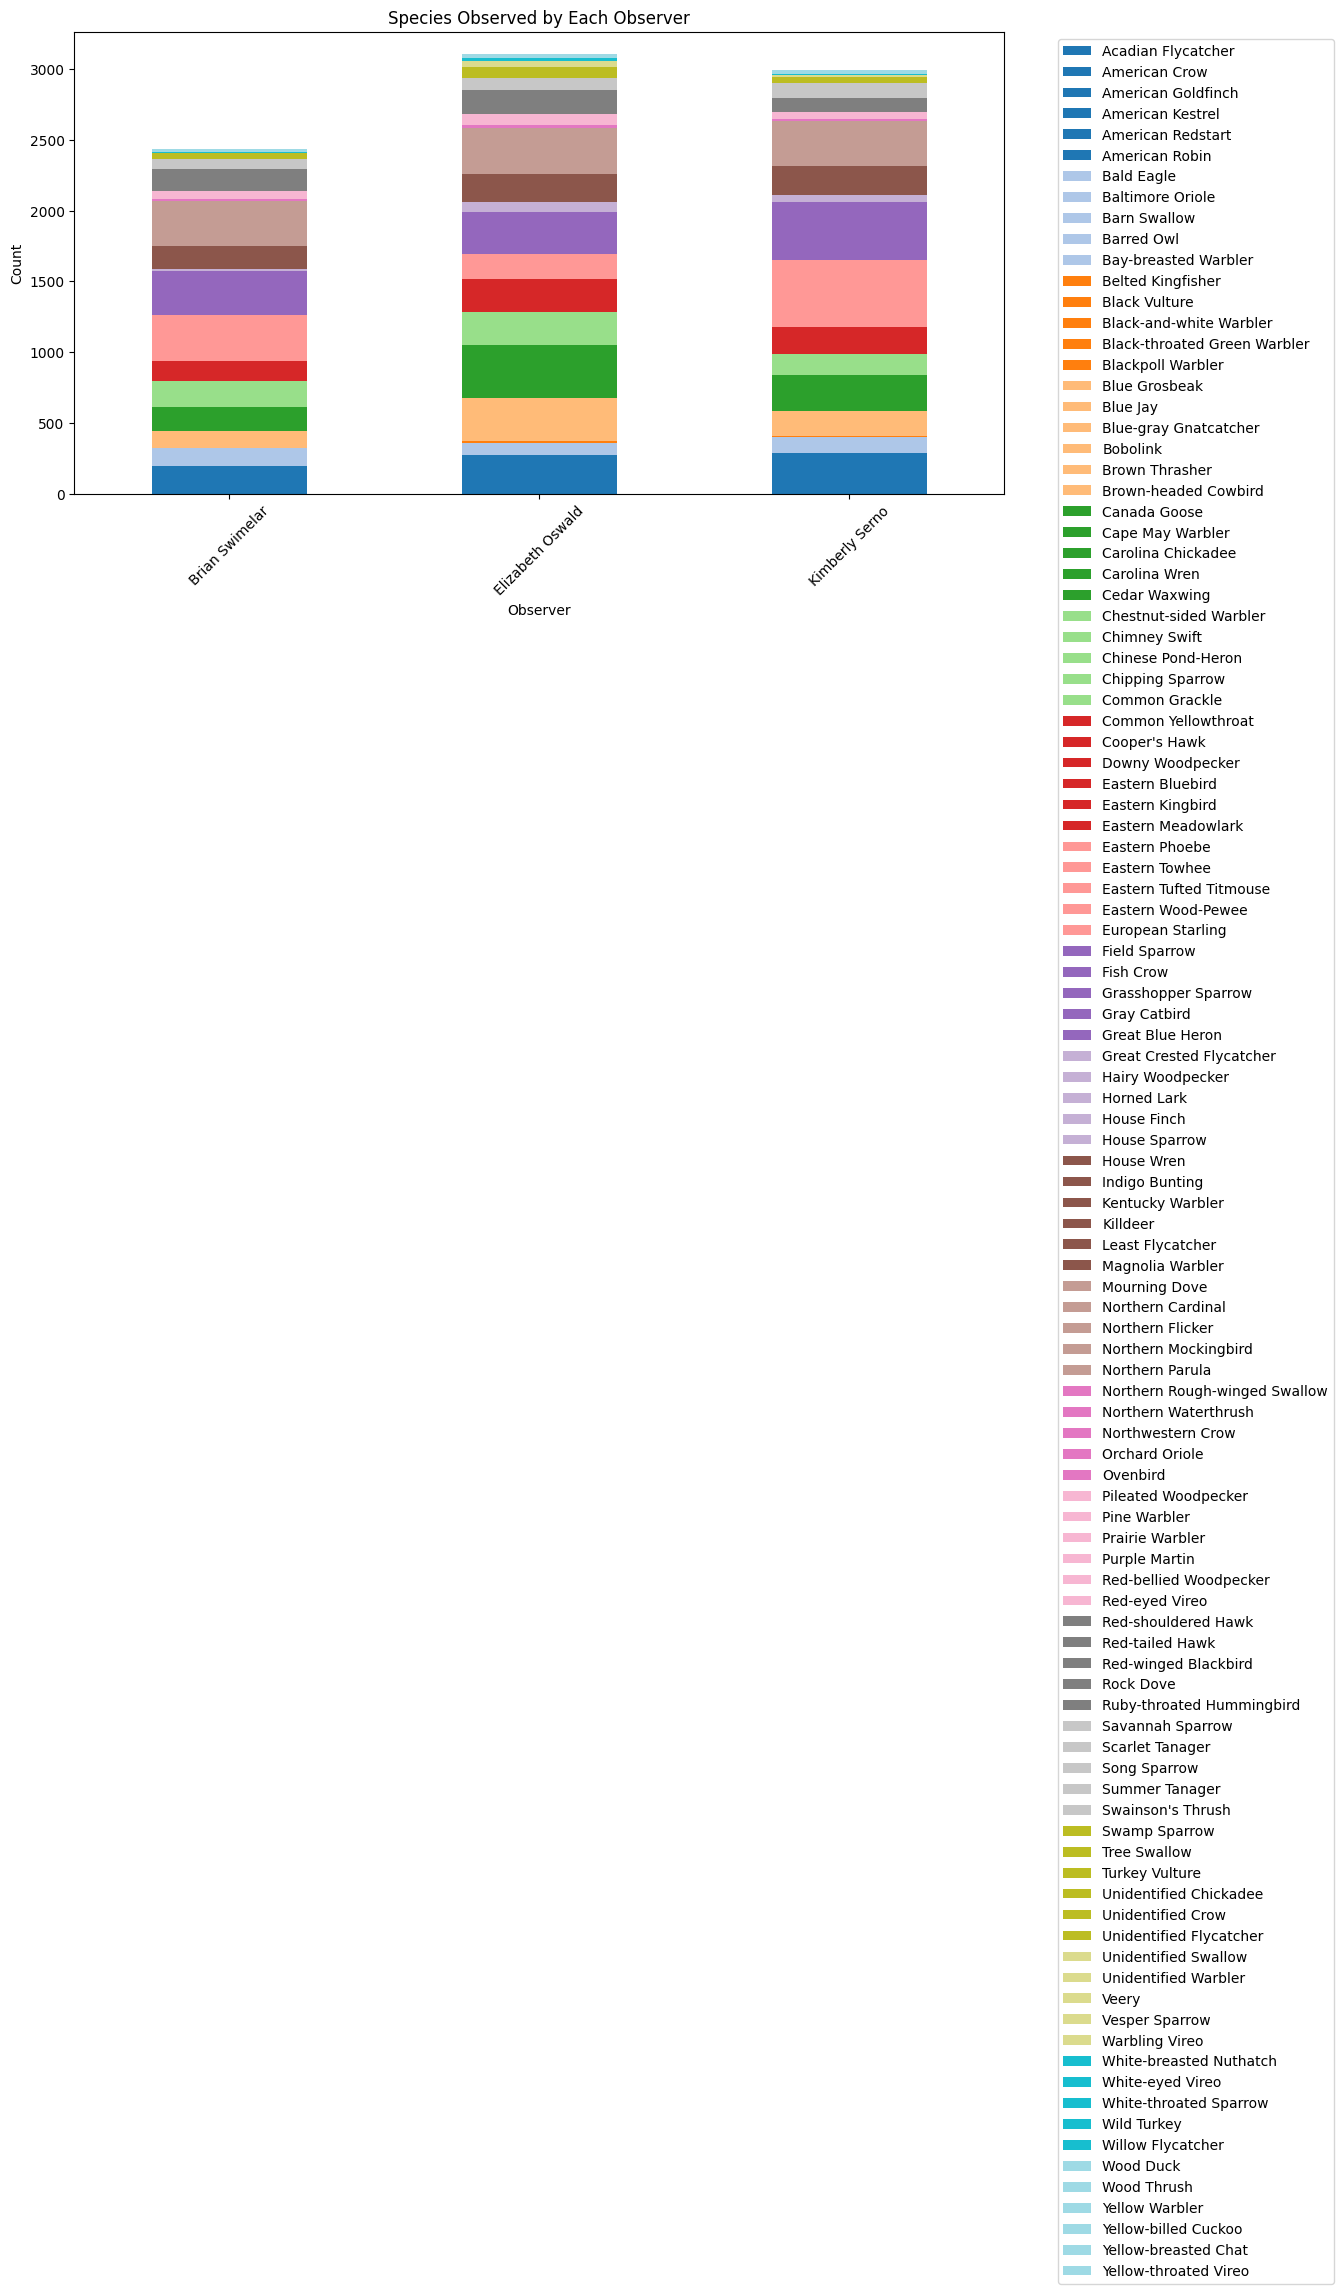

In [76]:
pivot_df = obs_species_counts.pivot(index='Observer', columns='Common_Name', values='Count').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Species Observed by Each Observer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


>*Visit Patterns: Evaluate the Visit column to see how repeated visits affect species count or diversity?*

In [77]:
Grassland['Visit'].unique()

array([1, 2, 3])

In [78]:
visit_counts = Grassland.groupby('Visit').size().reset_index(name='Total_Observations')
visit_counts

,Visit,Total_Observations
0,1,3206
1,2,2637
2,3,2688


C:\Users\dhars\AppData\Local\Temp\ipykernel_17800\1483679357.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




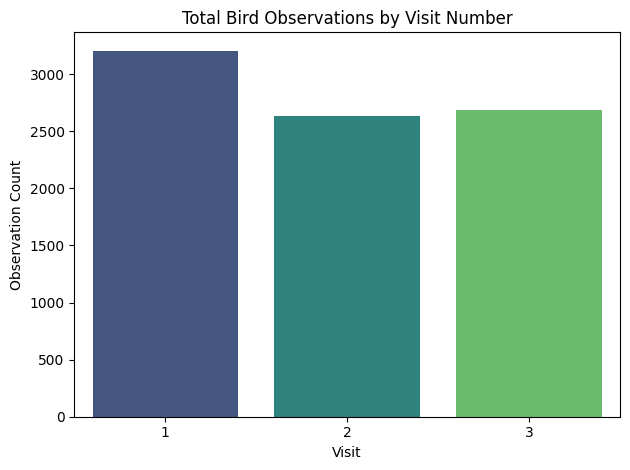

In [79]:
sns.barplot(data=visit_counts, x='Visit', y='Total_Observations', palette='viridis')
plt.title('Total Bird Observations by Visit Number')
plt.ylabel('Observation Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**7. Conservation Insights**

>*Watchlist Trends: Use the PIF_Watchlist_Status and Regional_Stewardship_Status to identify trends in species that are at risk or require conservation focus?*

- PIF_Watchlist_Status

In [80]:
# Count the occurrences of each status in PIF_Watchlist_Status
watchlist_counts = Grassland["PIF_Watchlist_Status"].value_counts().reset_index()
watchlist_counts.columns = ["Status", "Count"]
watchlist_counts

,Status,Count
0,False,8491
1,True,40


- Regional_Stewardship_Status

In [81]:
# Count the occurrences of each status in Regional_Stewardship_Status
stewardship_counts = Grassland["Regional_Stewardship_Status"].value_counts().reset_index()
stewardship_counts.columns = ["Status", "Count"]
stewardship_counts

,Status,Count
0,False,6991
1,True,1540


- PIF_Watchlist_Status and Regional_Stewardship_Status Trends:

C:\Users\dhars\AppData\Local\Temp\ipykernel_17800\3508456335.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\dhars\AppData\Local\Temp\ipykernel_17800\3508456335.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




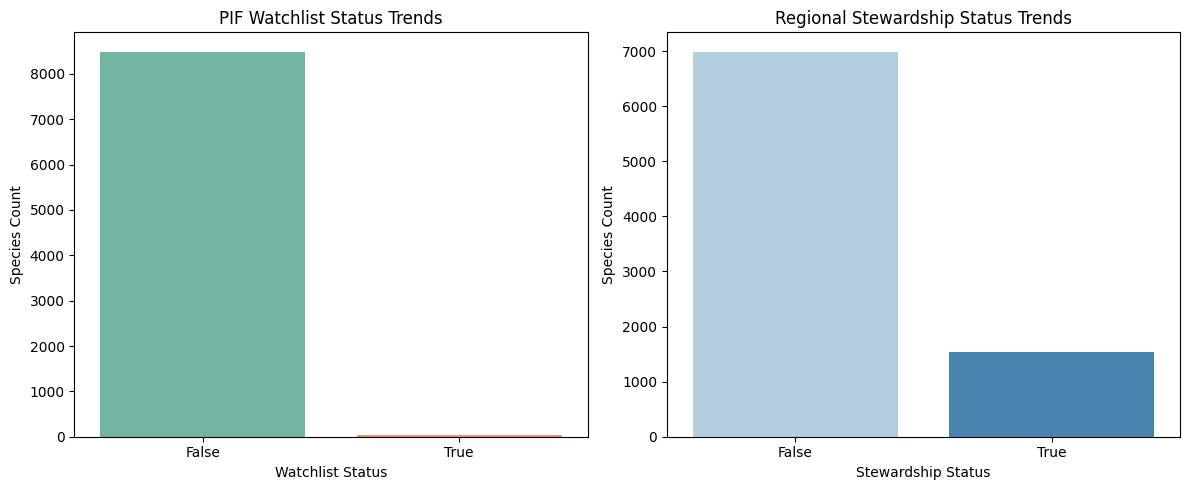

In [82]:
# Plot PIF Watchlist Trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Set2")
plt.title("PIF Watchlist Status Trends")
plt.xlabel("Watchlist Status")
plt.ylabel("Species Count")

# Plot Regional Stewardship Trends
plt.subplot(1, 2, 2)
sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")
plt.title("Regional Stewardship Status Trends")
plt.xlabel("Stewardship Status")
plt.ylabel("Species Count")

plt.tight_layout()
plt.show()

>*AOU Code Patterns: Study the distribution of species based on their AOU_Code to correlate with regional or national conservation priorities?*

In [83]:
# Count the occurrences of each AOU Code
AOU_Code_Counts = Grassland["AOU_Code"].value_counts().reset_index()
AOU_Code_Counts.columns = ["AOU_Code", "Count"]
AOU_Code_Counts.head()

,AOU_Code,Count
0,NOCA,565
1,EUST,516
2,FISP,506
3,INBU,485
4,GRSP,382


- Top Species Observed by AOU Code:

C:\Users\dhars\AppData\Local\Temp\ipykernel_17800\1775593456.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




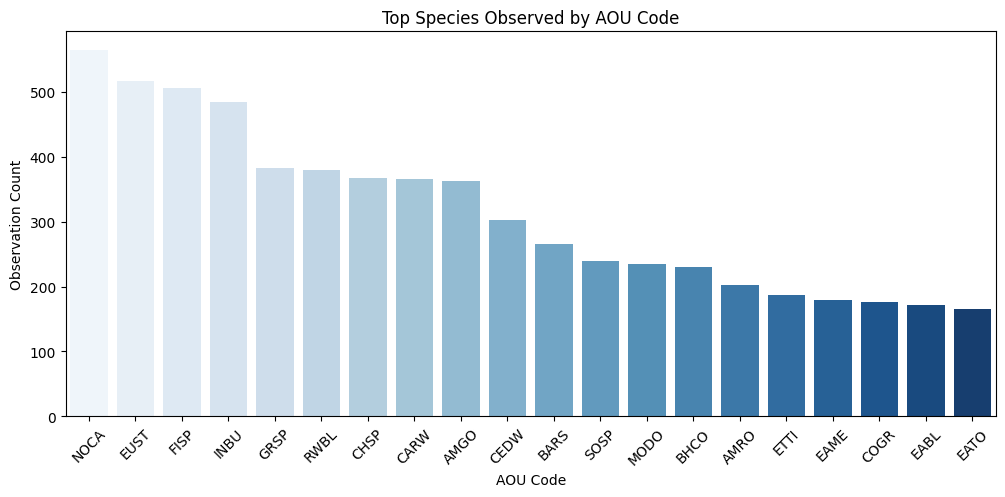

In [84]:
plt.figure(figsize=(12, 5))
sns.barplot(data=AOU_Code_Counts.head(20), x="AOU_Code", y="Count", palette="Blues")
plt.title("Top Species Observed by AOU Code")
plt.xlabel("AOU Code")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.show()

- EDA DataSet:

In [86]:
# Create the directory if it doesn't exist
output_dir = 'C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project2/Bird_Species_Observation/DataSet/CleanDataSet'
os.makedirs(output_dir, exist_ok=True)

# Now save the file
Grassland.to_csv(os.path.join(output_dir, 'EDA_Grassland_DataSet.csv'), index=False)

In [87]:
EDA_Grassland_DataSet=pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project2/Bird_Species_Observation/DataSet/CleanDataSet/EDA_Grassland_DataSet.csv")
EDA_Grassland_DataSet.head()

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Start_Timestamp,End_Timestamp,Start_Hour,End_Hour,Start_Time_Only,End_Time_Only,Duration,Duration_Hours,Month,Dates,WeekDay_Name,iso,Season
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Chipping Sparrow,Spizella passerina,179435.0,84781.0,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Male,Grasshopper Sparrow,Ammodramus savannarum,179333.0,83867.0,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Field Sparrow,Spizella pusilla,179443.0,84790.0,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,2018-05-22 05:35:00,2018-05-22 05:45:00,5,5,05:35:00,05:45:00,0 days 00:10:00,0.166667,5,22,Tuesday,21,Spring
